In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, SkyCoord, AltAz
from astropy import units as u
from astropy.time import Time
from astropy import coordinates as coord
from shapely.geometry import Polygon
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.path import Path
import pandas as pd
import matplotlib.colors as colors
import os

from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

def equatorial_to_galactic(ra, dec):
    equatorial_coords = coord.SkyCoord(ra*u.rad, dec*u.rad, frame='icrs')

    galactic_coords = equatorial_coords.galactic
    l = galactic_coords.l.wrap_at(180*u.deg).rad
    b = galactic_coords.b.rad    
    return l, b

def galactical_to_equatorial(l, b):
    galactical_coords = coord.SkyCoord(l*u.rad, b*u.rad, frame='galactic')

    equatorial_coords = galactical_coords.icrs
    ra  = equatorial_coords.ra.wrap_at(180*u.deg).rad
    dec = equatorial_coords.dec.rad    
    return ra, dec

def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
           Path(np.asarray(poly.exterior.coords)[:, :2]),
           *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])
 
    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
     
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 400     # resolution of saved images


#################################################
# Set the location of the telescope on Earth
latM, lonM = 28.761669, -17.890759
# latM, lonM = -23.271845, 16.502914

fov_angle = 61 # in degrees

# other points in galactical coordinates
l_points = np.deg2rad([0, 170])
b_points = np.deg2rad([0, -15])
#################################################


# Generate random equatorial coordinates
ra  = np.random.uniform(-np.pi,   np.pi,   10000)
dec = np.random.uniform(-np.pi/2, np.pi/2, 10000)
# convert to galactical
l, b = equatorial_to_galactic(ra, dec)

cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])
dec_mask = (dec > cuts_dec[0]) & (dec < cuts_dec[1])
ra_cut  = ra[ dec_mask]
dec_cut = dec[dec_mask]
# convert to galactical
l_cut, b_cut = equatorial_to_galactic(ra_cut, dec_cut)

# convert the point sinto equatorial
ra_points, dec_points = galactical_to_equatorial(l_points, b_points)


# galaxy band
l_gals = np.random.uniform(-np.pi, np.pi, size=10000)
b_gals = np.random.uniform(-np.pi/2, np.pi/2, size=10000)

cuts_b = np.deg2rad([-5, 5])
b_mask = (b_gals > cuts_b[0]) & (b_gals < cuts_b[1])
l_gals = l_gals[b_mask]
b_gals = b_gals[b_mask]

ra_gals, dec_gals = galactical_to_equatorial(l_gals, b_gals)

# galaxy band
l_gal = np.linspace(-np.pi, np.pi, 200)
b_gal = np.repeat(0, len(l_gal))
ra_gal, dec_gal = galactical_to_equatorial(l_gal, b_gal)

# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
dec_top = np.repeat(cuts_dec[1], len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

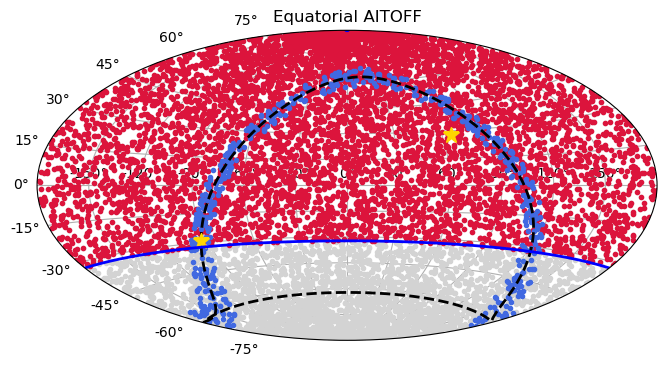

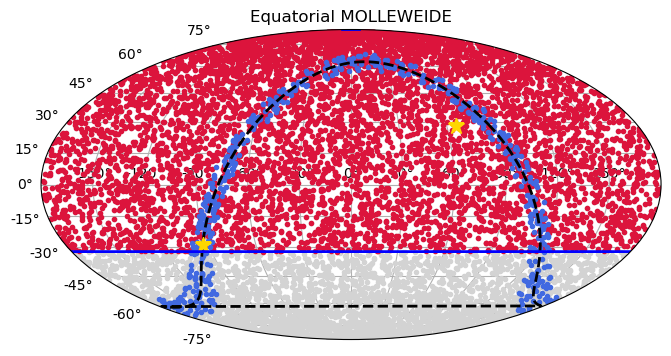

In [2]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='aitoff')
ax.set_title('Equatorial AITOFF')
ax.plot(ra, dec, '.', color='lightgray')
ax.plot(ra_cut, dec_cut, '.', color='crimson')
ax.plot(ra_gals, dec_gals, '.', color='royalblue')
ax.plot(ra_gal, dec_gal, '--', color='k', lw=2)

for r, d in zip(ra_points, dec_points):
    ax.plot(r, d, '*', color='gold', ms=12)
    
ax.plot(ra_top, dec_top, '-', color='b', lw=2)    
ax.plot(ra_bottom, dec_bottom, '-', color='b', lw=2)    
    
ax.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title('Equatorial MOLLEWEIDE')
ax.plot(ra, dec, '.', color='lightgray')
ax.plot(ra_cut, dec_cut, '.', color='crimson')
ax.plot(ra_gals, dec_gals, '.', color='royalblue')
ax.plot(ra_gal, dec_gal, '--', color='k', lw=2)

for r, d in zip(ra_points, dec_points):
    ax.plot(r, d, '*', color='gold', ms=12)
    
ax.plot(ra_top, dec_top, '-', color='b', lw=2)    
ax.plot(ra_bottom, dec_bottom, '-', color='b', lw=2)   

ax.grid(True)
plt.show()

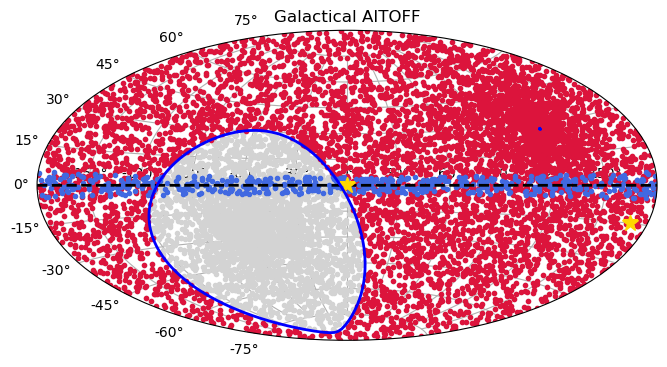

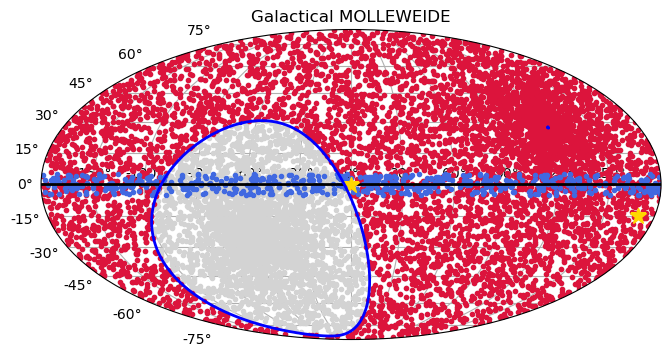

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='aitoff')
ax.set_title('Galactical AITOFF')
ax.plot(l, b, '.', color='lightgray')
ax.plot(l_cut, b_cut, '.', color='crimson')
ax.plot(l_gals, b_gals, '.', color='royalblue')
ax.plot(l_gal, b_gal, '--', color='k', lw=2)

for r, d in zip(l_points, b_points):
    ax.plot(r, d, '*', color='gold', ms=12)
    
ax.plot(l_top, b_top, '-', color='b', lw=2)    
ax.plot(l_bottom, b_bottom, '-', color='b', lw=2)   

ax.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title('Galactical MOLLEWEIDE')
ax.plot(l, b, '.', color='lightgray')
ax.plot(l_cut, b_cut, '.', color='crimson')
ax.plot(l_gals, b_gals, '.', color='royalblue')
ax.plot(l_gal, b_gal, '-', color='k', lw=2)

for r, d in zip(l_points, b_points):
    ax.plot(r, d, '*', color='gold', ms=12)
    
ax.plot(l_top, b_top, '-', color='b', lw=2)    
ax.plot(l_bottom, b_bottom, '-', color='b', lw=2) 

ax.grid(True)
plt.show()

## Reading sources data

In [4]:
table_path = 'data/xml_table_from_drive.csv'
# column names of the table
vnames = ['Date', 'Source', 'Conditions', 'Trigger', 'Stereo', 'HV', 'MinZd [deg]', 'MaxZd [deg]',
          'LST runs', 'MAGIC first run', 'MAGIC last run', 'Obs time (min)', 'Same wobble (min)', '-']

# reading the table
df = pd.read_csv(table_path, names=vnames, index_col=False).drop('-', axis=1)
df = df[df['Source'].notna()][1:].reset_index(drop=True)

# now we convert magic runs to an array of runs
df['MAGIC runs'] = [np.arange(int(df['MAGIC first run'][n]), int(df['MAGIC last run'][n]) + 1, 1) for n in range(len(df))]    
df['LST runs']   = [np.fromstring(df['LST runs'][n][1:-1], dtype='int', sep=',')                  for n in range(len(df))] 
df.drop(['MAGIC first run', 'MAGIC last run'], axis=1, inplace=True)

# putting together LST and MAGIC run columns, interchanging places
df['Obs time (min)'], df.loc[:,'MAGIC runs'] = df['MAGIC runs'], df['Obs time (min)']
df.rename(columns={'Obs time (min)':'MAGIC runs','MAGIC runs':'Obs time (min)'}, inplace=True)

# updating some of the columns
for string in ['MinZd [deg]', 'MaxZd [deg]', 'Obs time (min)', 'Same wobble (min)']:
    df[string] = pd.to_numeric(df[string])

# adding a date column
df['Date'] = pd.to_datetime(df['Date'], format='%Y_%m_%d')   
    
display(df.head(5))

,Date,Source,Conditions,Trigger,Stereo,HV,MinZd [deg],MaxZd [deg],LST runs,MAGIC runs,Same wobble (min),Obs time (min)
0,2019-11-23,CrabNebula,['Dark'],['Sum'],[True],['Nominal'],9.82,15.38,[1622],"[5086812, 5086813]",0.0,29.66
1,2019-11-24,CrabNebula,['Dark'],['Sum'],[True],['Nominal'],8.26,14.49,"[1631, 1632, 1633]","[5086858, 5086859]",0.0,31.28
2,2019-11-26,CrabNebula,['Dark'],['L3T'],[True],['Nominal'],9.92,23.16,"[1651, 1652, 1653]","[5086952, 5086953]",0.0,45.12
3,2020-01-14,CrabNebula,['Dark'],['SumT'],[True],['Nominal'],17.39,29.16,"[1787, 1788]","[5088351, 5088352, 5088353]",0.0,58.14
4,2020-01-15,CrabNebula,"['Dark', 'Moon']","['SumT', 'L3T']",[True],['Nominal'],19.18,42.52,"[1799, 1800, 1801]","[5088408, 5088409, 5088410, 5088411, 5088412, ...",0.0,77.78


In [5]:
total_observation_time = df.groupby('Source')['Obs time (min)'].sum()
new_df = pd.DataFrame({'Source': total_observation_time.index, 'Total Observation Time': total_observation_time.values})
new_df = new_df.sort_values('Total Observation Time', ascending=False)
new_df

,Source,Total Observation Time
11,CrabNebula,5034.09
9,BLLac,2289.10
47,Mrk501,2056.65
46,Mrk421,1946.63
39,LHAASOJ2108+,1936.12
...,...,...
27,GRB220519,18.78
15,FRB20200120E,16.87
22,GRB210704A,10.89
23,GRB210802A,10.11


In [6]:
sources = [['CrabNebula', 'Crab'], ['BLLac', 'BL Lac'], ['LHAASOJ2108+', 'LHAASOJ2108+5157'], ['GalacticCent', 'Sgr A*'],
           ['RSOph', 'HD 162214'], ['Boomerang-Ta', 'LHAASO J2226+6057'], ['1A-0535+262', '1A 0535+262'],
           ['SDSSJ1430+23', 'PGC 214276'], ['LhaasoJ1956+', 'LHAASO J1956+2845'],
           ['FRB-20200120', 'FRB 20200120E'], ['LSI+61', 'LS I +61 303'], ['Cyg-X3', 'V1521 Cyg'], ['PSRJ2229+611', 'PSRJ2229+6114'],
           ['B21348+30B', 'B2 1348+30B'],['S40954+65', 'CGRaBSJ0958+6533'], ['1ES1028+51', '1ES1028+511'],['LHAASOJ0341+', 'LHAASO J0341+5258']]

for s in sources:
    new_df['Source'][new_df['Source'] == s[0]] = s[1]
    
    
drop = ['GRB220311A', 'MAXIJ1848-01', 'GRB210511B', 'IC-220303A', 'IC20220624A', 'Mrk501-Mon', 'Cygnus-XNort', 'RGB0521+211', 'GRB221023A',
        'M87-Mon', 'GRB220519', 'PSRJ1402+13', 'FRB20200120E']
new_df = new_df.drop(new_df[new_df['Source'].isin(drop)].index)


new_df

/tmp/ipykernel_11389/3624984112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Source'][new_df['Source'] == s[0]] = s[1]
/tmp/ipykernel_11389/3624984112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Source'][new_df['Source'] == s[0]] = s[1]
/tmp/ipykernel_11389/3624984112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Source'][new_df['Source'] == s[0]] = s[1]
/tmp/ipykernel_11389/3624984112.py:8:

,Source,Total Observation Time
11,Crab,5034.09
9,BL Lac,2289.10
47,Mrk501,2056.65
46,Mrk421,1946.63
39,LHAASOJ2108+5157,1936.12
34,Sgr A*,1821.65
43,M87,1074.70
4,1ES1959+650,1000.32
31,GRB221009A,930.49
64,SGR1935+2154,705.47


In [7]:
L, B = [], []
sources = []

for i, source in zip(range(len(new_df['Source'])), new_df['Source']):
    print(i, source)
    coords = SkyCoord.from_name(source)
    galactic_coords = coords.galactic
    L.append(galactic_coords.l.wrap_at(180*u.deg).rad)
    B.append(galactic_coords.b.rad)
    sources.append(source)
L, B, sources = -1*np.array(L), np.array(B), np.array(sources)

obs_t = new_df['Total Observation Time'].to_numpy()

0 Crab
1 BL Lac
2 Mrk501
3 Mrk421
4 LHAASOJ2108+5157
5 Sgr A*
6 M87
7 1ES1959+650
8 GRB221009A
9 SGR1935+2154
10 HD 162214
11 LHAASO J2226+6057
12 FRB20220912A
13 M82
14 1A 0535+262
15 PG1553+113
16 1ES0647+250
17 1ES2344+514
18 USco
19 PGC 214276
20 HESS1857+026
21 LHAASO J1956+2845
22 FRB 20200120E
23 PKS1510-089
24 S20109+22
25 GRB220521
26 LS I +61 303
27 V1521 Cyg
28 GRB220930A
29 TXS1700+685
30 GRB221028A
31 PKS1725+044
32 3C345
33 PSRJ2229+6114
34 GRB200711A
35 3c279
36 GRB201216C
37 B2 1348+30B
38 OP313
39 PKS0420-01
40 OT081
41 PKS1749+096
42 CGRaBSJ0958+6533
43 GRB220302A
44 1ES1215+303
45 1ES1028+511
46 PKS1406-076
47 GRB210217
48 GRB210807A
49 GRB200826
50 GRB220527A
51 Ton116
52 GRB210704A
53 GRB210802A
54 LHAASO J0341+5258


# Definitive plot

In [8]:
#################################################
# Set the location of the telescope on Earth
latM, lonM = 28.761669, -17.890759
# latM, lonM = -23.271845, 16.502914

fov_angle = 56 # in degrees

# other points in galactical coordinates
l_points = np.deg2rad([0, 170])
b_points = np.deg2rad([0, -15])
#################################################


In [9]:
cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])

# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
if cuts_dec[1] <= np.pi/2: 
    dec_top = np.repeat(cuts_dec[1], len(ra_top))
else:
    dec_top = np.repeat(np.pi/2, len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)
plt.tight_layout()

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

polygon_exterior = [(-ll, bb) for ll, bb in zip(l_bottom, b_bottom)]
polygon_interior = [(-ll, bb) for ll, bb in zip(l_top, b_top)] 

<Figure size 640x480 with 0 Axes>

In [10]:
fov_angle = 90
cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])
# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
if cuts_dec[1] <= np.pi/2: 
    dec_top = np.repeat(cuts_dec[1], len(ra_top))
else:
    dec_top = np.repeat(np.pi/2, len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)
plt.tight_layout()

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

polygon_exteriorT = [(-ll, bb) for ll, bb in zip(l_bottom, b_bottom)]
polygon_interiorT = [(-ll, bb) for ll, bb in zip(l_top, b_top)] 

fov_angle = 70
cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])
# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
if cuts_dec[1] <= np.pi/2: 
    dec_top = np.repeat(cuts_dec[1], len(ra_top))
else:
    dec_top = np.repeat(np.pi/2, len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)
plt.tight_layout()

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

polygon_exteriorT1 = [(-ll, bb) for ll, bb in zip(l_bottom, b_bottom)]
polygon_interiorT1 = [(-ll, bb) for ll, bb in zip(l_top, b_top)] 

fov_angle = 80

cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])
# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
if cuts_dec[1] <= np.pi/2: 
    dec_top = np.repeat(cuts_dec[1], len(ra_top))
else:
    dec_top = np.repeat(np.pi/2, len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)
plt.tight_layout()

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

polygon_exteriorT2 = [(-ll, bb) for ll, bb in zip(l_bottom, b_bottom)]
polygon_interiorT2 = [(-ll, bb) for ll, bb in zip(l_top, b_top)] 

fov_angle = 60

cuts_dec = np.deg2rad([latM-fov_angle, latM+fov_angle])
# top limit 
ra_top  = np.linspace(-np.pi, np.pi, 300)
if cuts_dec[1] <= np.pi/2: 
    dec_top = np.repeat(cuts_dec[1], len(ra_top))
else:
    dec_top = np.repeat(np.pi/2, len(ra_top))
l_top, b_top = equatorial_to_galactic(ra_top, dec_top)
plt.tight_layout()

# bottom limits
ra_bottom  = np.linspace(-np.pi, np.pi, 300)
dec_bottom = np.repeat(cuts_dec[0], len(ra_bottom))
l_bottom, b_bottom = equatorial_to_galactic(ra_bottom, dec_bottom)

polygon_exteriorT3 = [(-ll, bb) for ll, bb in zip(l_bottom, b_bottom)]
polygon_interiorT3 = [(-ll, bb) for ll, bb in zip(l_top, b_top)] 

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_11389/1848034022.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = PathPatch(path, **kwargs)


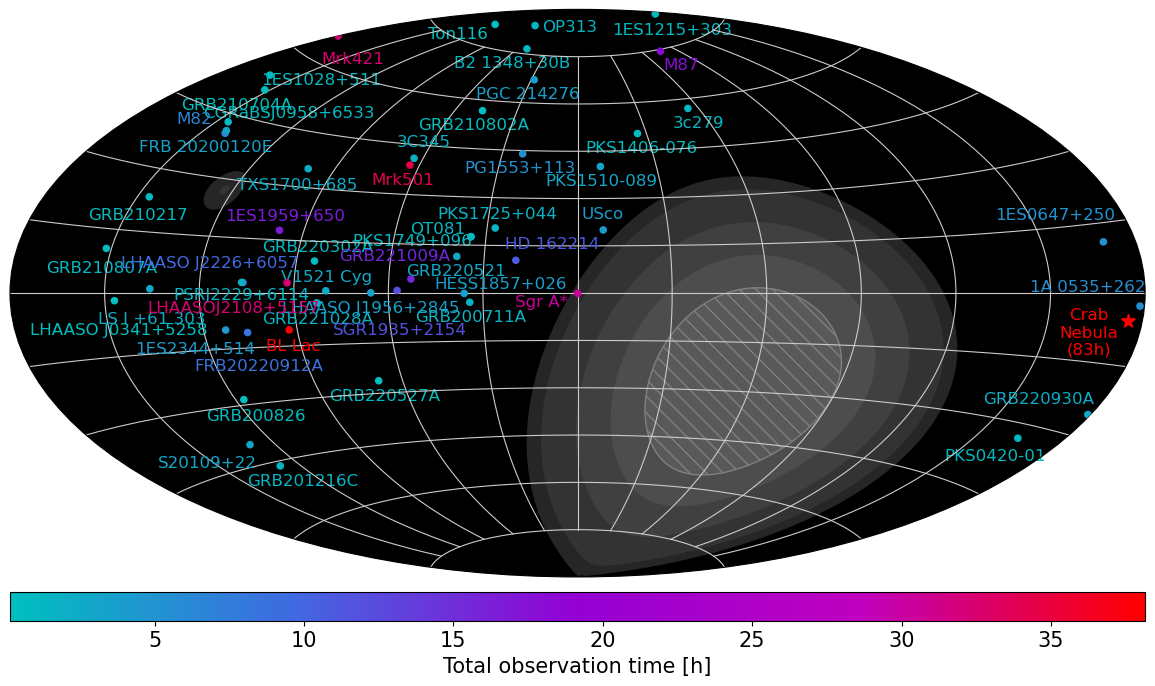

In [13]:
########################3
blindcolor = '0.2'
blindcolor2 = '0.35'
bkg_color  = 'k'
grid_color = '0.8'
edgcl      = '0.5'
txt_col = 'r'
#########################



fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='aitoff')

edgcl      = 'none'
polygon_ext, polygon_int = Polygon(polygon_exterior), Polygon(polygon_interior)
plot_polygon(ax=ax, poly=polygon_ext, color='0.15', zorder=-100, edgecolor=edgcl, hatch='')
plot_polygon(ax=ax, poly=polygon_int, color='0.15', zorder=-100, edgecolor=edgcl, hatch='')

polygon_ext, polygon_int = Polygon(polygon_exteriorT3), Polygon(polygon_interiorT3)
plot_polygon(ax=ax, poly=polygon_ext, color='0.2', zorder=-100, edgecolor=edgcl, hatch='')
plot_polygon(ax=ax, poly=polygon_int, color='0.2', zorder=-100, edgecolor=edgcl, hatch='')

polygon_ext, polygon_int = Polygon(polygon_exteriorT1), Polygon(polygon_interiorT1)
plot_polygon(ax=ax, poly=polygon_ext, color='0.25', zorder=-100, edgecolor=edgcl, hatch='')
# plot_polygon(ax=ax, poly=polygon_int, color=blindcolor2, zorder=-100, edgecolor=edgcl, hatch='\\\\')

polygon_ext, polygon_int = Polygon(polygon_exteriorT2), Polygon(polygon_interiorT2)
plot_polygon(ax=ax, poly=polygon_ext, color='0.3', zorder=-100, edgecolor=edgcl, hatch='')
# plot_polygon(ax=ax, poly=polygon_int, color=blindcolor2, zorder=-100, edgecolor=edgcl, hatch='\\\\')


edgcl      = '0.5'
polygon_ext, polygon_int = Polygon(polygon_exteriorT), Polygon(polygon_interiorT)
plot_polygon(ax=ax, poly=polygon_ext, color=blindcolor2, zorder=-100, edgecolor=edgcl, hatch='\\\\')
# plot_polygon(ax=ax, poly=polygon_int, color=blindcolor2, zorder=-100, edgecolor=edgcl, hatch='\\\\')

cmap = colors.LinearSegmentedColormap.from_list('',  ['c', 'royalblue','darkviolet', 'm', 'r'])
sc = ax.scatter(L[1:], B[1:], c=obs_t[1:]/60, marker='o', s=20, cmap=cmap, zorder=10)
ax.scatter(L[0], B[0], c='r', marker='*', s=100, zorder=10)

cbar = fig.colorbar(sc, ax=ax, orientation='horizontal', pad=0.02, aspect=40)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(15)
cbar.set_label(label='Total observation time [h]', size=15)

dispx = np.zeros(len(B))
dispy = np.zeros(len(B))-0.08

idx = [4,     3,    8,    7,    5,     16,   14,    17,   12,    11,    9,    13,   18,   10,   27,   20,   26,    28,    24,   32,   33,   31,   44]
chx = [-0.3,  0.6,  -0.1, 0,    -0.2,  -0.2, -0.29, -0.2, 0,     -0.2,  0,    -0.3, 0,    0.1,  0,    0.2,  0,     -0.35, -0.4, 0,    0,    0,    -0.8]
chy = [-0.04, 0.05, 0.2,  0.15, 0.03,  0.2,  0.15,  0,    -0.08,  0.17, -0.13, 0.1,  0.17, 0.17, 0.15, 0.13, -0.05, 0.1,  0.05, 0.17, 0.02, 0.16, 0.02]

idx = [*idx, 38,  40,   10,  41,    43,   42,   45,   54, ]
chx = [*chx, 1.2, -0.2, 0.1, -0.33, 0,    0.3,  0.4,  0,  ]
chy = [*chy, 0.1, 0.12, 0,   0.05,  0.15, 0.17, 0.13, -0.04, ]

for i in range(len(idx)):
    dispx[idx[i]] = dispx[idx[i]] + chx[i]
    dispy[idx[i]] = dispy[idx[i]] + chy[i]    

for i in range(len(B)-1):
    ax.text(L[i+1]+dispx[i+1], B[i+1]+dispy[i+1], sources[i+1], color=sc.to_rgba(obs_t[i+1]/60), zorder=obs_t[i+1]/60, ha='center', va='center', fontsize=12)
ax.text(L[0]-0.2, B[0]-0.05, sources[0]+'\nNebula\n(83h)', color='r', zorder=obs_t[0]/60, ha='center', va='center', fontsize=12)
    
# for i in range(len(B)-1):
#     ax.text(L[i+1], B[i+1], f'{i+1}', color='w', zorder=300, ha='center', va='center', fontsize=15)

    
    
plt.tight_layout()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color=grid_color)
ax.set_facecolor(bkg_color)

plt.savefig(f'{pltpath}sources-stereo.png', bbox_inches='tight', dpi=dpi)
plt.show()